<h1>WGU D209 TASK 1 REV 4 - MATTINSON</h1>

<div style="text-align: center; 
    line-height: 48px;
    font-size: 24px; " >  
    KNN - Telecom Churn Data<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    Task 1 - KNN Classification<br>
    November 16, 2021<br>
</div>

<div style="font-family:Impact;">Configure Notebook.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Import and configure packages. All of the code for importing and configuring is contained in a imports .PY file. Also, there is a second helpers .PY file to define a few functions used throughout this notebook.</span></div>

In [1]:
# import and configure packages
from imports import *
%matplotlib inline
warnings.filterwarnings('ignore')

P:\code\wgu\py39\Scripts\python.exe
python version: 3.9.7
pandas version: 1.3.0
numpy version: 1.19.5
scipy version: 1.7.1
sklearn version: 1.0.1
matplotlib version: 3.4.2
seaborn version: 0.11.2
graphviz version: 0.17


In [2]:
from helpers import *

getFilename version: 1.0
saveTable version: 1.0
describeData version: 1.0
createScatter version: 1.0
createBarplot version: 1.1
get_unique_numbers version: 1.0
createCorrelationMatrix version: 1.0
createStackedHistogram version: 1.0
plotDataset version: 1.0


<h2>Part I: Research Question</h2>A.  Describe the purpose of this data mining report by doing the following:

<h3>A1. Propose <b>one</b> question relevant to a real-world organizational situation that you will answer using one of the following classification methods: (a) k-nearest neighbor (KNN) or (b) Naive Bayes.</h3>

<div style="font-family:Impact;">Primary Goal. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The question has come up for a telecommunications company regarding churn. <b>Churn</b> is defined when a customer chooses to stop services. If the company has data on customers that have and have not churned in the past, is it possible to classify a new (or existing) customer based on their similarity to other customers with similar attributes that have and have not churned in the past. This analysis will consider two (2) attributes, <b>MonthlyCharge</b> and <b>Tenure</b> within the company's customer data of 10,000 customers. In addition, if the prediction is made, the analysis will also attempt to quantify the accuracy of the prediction.</span></div>

<h3>A2. Define <b>one</b> goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.</h3>

<div style="font-family:Impact;">Primary Goal. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The analysis will attempt to predict <b>Churn</b> for a new customer with values of <b>MonthlyCharge</b> = $170.00 and <b>Tenure</b> = 1.0. This goal is within the scope of the company's customer data, both attributes are contained with the data for 10,000 customers and should provide adequate data for the prediction. The analysis will use K-nearest neighbors (KNN) to classify the new customer based on the k-nearest other customers with similar attributes.</span></div>

In [3]:
# define new customer
import pandas as pd
newCustomer = pd.DataFrame([{'Tenure': 1.0,
                             'MonthlyCharge': 170.0,
                            'zTenure': 0.0,
                            'zMonthlyCharge': 0.0}])

<h2>Part II: Method Justification</h2>B.  Explain the reasons for your chosen classification method from part A1 by doing the following:

<h3>B1. Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.</h3>

<div style="font-family:Impact;">Explain Method. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">
KNN classification will look for similar attributes in the closest k-neighbors, that are in close proximity to the target value to be classified. It will decide which classification value occurs most frequently in those k-neighbors and then output a classification prediction based on those values. I would expect the results to show the target variable as it relates to the k-neighbors and accuracy summaries for the model.</span></div> 

<h3>B2. Summarize <b>one</b> assumption of the chosen classification method.</h3>

<div style="font-family:Impact;">One Assumption. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">One key assumption for KNN modeling is that similar things are close to each other. To classify the new customer, it will look for similar customer records and then make a classification based on which class occurs most frequently in those close neighbors. </span></div>

<h3>B3. List the packages or libraries you have chosen for <b>Python</b> or R, and justify how each item on the list supports the analysis.</h3>

<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">All of the Python packages required for this analysis were loaded at the very top of th notebook. The packages and version numbers are presented. Besides the normal Python packages (numpy, scipy, matplotlib, pandas, etc.) the primary package required to create and view the classification model comes from sklearn. Also, I use two  (2) .PY files instead of including all that code in this notebook, I reuse it in other notebooks. Imports.py has all of the required packages and Helpers.py has many helpful functions that allow me to standardize my tables, figures and other parts of the notebook. Both of these .PY files will be included with the notebook for reference.</span></div>

<h2>Part III: Data Preparation</h2>C.  Perform data preparation for the chosen data set by doing the following:

<h3>C1. Describe <b>one</b> data preprocessing goal relevant to the classification method from part A1.</h3>

<div style="font-family:Impact;">One Data Preprocessing Goal. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">
In order to apply the KNN classification analysis to this problem, the company data must be imported into the Python environment and then the raw numerical data must be normalized. In addition, the company data will be broken up into two (2) subsets, 70% in a training dataset, and the remain 30% in a testing or validation dataset. The KNN will then use the training set to build the model, and it will use the test set to validate the model. The main goal for data preparation will be to define these subsets of data is a manner that is as simple and intuitive as possible, to allow anyone to follow the analysis throughout the notebook. The following is a list of the planned data variables for this analysis:</span></div>

<div style="font-family:Impact;">Raw Data. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">
<ul style="line-height: 30px;">
    <li><b>y</b> = target data (i.e. <b>Churn</b> (categorical))
    <li><b>X</b> = feature data (i.e. <b>MonthlyCharge</b>, and <b>Tenure</b>)
    <li><b>rawData</b> = y.merge(X)       
</ul>

<div style="font-family:Impact;">Clean Data. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">
<ul style="line-height: 30px;">
    <li><b>y</b> = target data (i.e. <b>Churn</b> (bool))
    <li><b>X</b> = feature data (i.e. <b>MonthlyCharge</b>, <b>Tenure</b>, <b>zMonthlyCharge</b>, and <b>zTenure</b>)
    <li><b>cleanData</b> = y.merge(X)       
</ul>

<div style="font-family:Impact;">Training Data. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">70% of the cleaned data.
<ul style="line-height: 30px;">
    <li><b>X_train</b> = created using train-test-split (i.e. <b>zMonthlyCharge</b>, and <b>zTenure</b>)
    <li><b>y_train</b> = created using train-test-split 
    <li><b>trainData</b> = y_train.merge(X_train)        
</ul>

<div style="font-family:Impact;">Testing Data. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The remaining 30% of the cleaned data.
<ul style="line-height: 30px;">
    <li><b>X_test</b> = created using train-test-split (i.e. <b>zMonthlyCharge</b>, and <b>zTenure</b>)
    <li><b>y_test</b> = created using train-test-split 
    <li><b>testData</b> = y_test.merge(X_test)        
</ul>

<h3>C2. Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.</h3>

<div style="font-family:Impact;">Identify Initial Variables. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">
For this analysis, I will consider two (2) features, <b>MonthlyCharge</b> and <b>Tenure</b>, and one (1) target, <b>Churn</b>. Pandas is used to read the .CSV raw data file, the USECOLS option retrieves only selected data from the file.</span></div>

<ul style="line-height: 30px;">
    <li><b>MonthlyCharge</b> (FEATURE) the amount charged to the customer monthly, it reflects an average per customer
    <li><b>Tenure</b> (FEATURE) the number of months the customer has stayed with the provider
    <li><b>Churn</b> (TARGET) is whether the customer has discontinued service within the last month (yes, no).
</ul>

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 3-1.<span style="font-weight: normal;">SELECTED RAW DATA.</span></div>Initial state of dataset before any manipulations.

In [4]:
# read subset of company's customer data from csv file
raw = pd.read_csv('data/churn_clean.csv', 
        usecols=['Churn','Tenure','MonthlyCharge'])
saveTable(data=raw, title='RAW', sect='C2', 
    course='D209', task='Task2', caption='3 1')

,0,1,2,3
Churn,No,Yes,No,No
Tenure,6.796,1.157,15.754,17.087
MonthlyCharge,172.456,242.633,159.948,119.957


shape: (10000, 3)
Table saved to: TABLES/D209_TASK2_C2_TAB_3_1_RAW.CSV


<div style="font-family:Impact;">Summary. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The company's customer raw data has been read into the df variable and consists of 10,000 customer records with three (3) variables each. Two (2) of the variables will be used as features and are continuous (numerical) data, and the the third variable is our target, binary variable. In addition to the raw data, a Z-scored column was also included for each variable which is the standard transformation.</span></div>

<h3>C3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.</h3>

<div style="font-family: 'Impact';">Step 1.</div>Read in selected company data. Applicable customer data (<b>Churn</b>, <b>MonthlyCharge</b> and <b>Tenure</b>) from the company data was read into Python environment using pandas .read_cs() function using the usecols=[] option. This was completed in section C2 [9] above.

In [5]:
# start with a copy of raw data
clean = raw.copy()

<div style="font-family: 'Impact';">Step 2.</div>Convert cateogrical data. </div>Initially, the <b>Churn</b> variable was categorical, each row was Yes or No values, so this step converted the categorical data to boolean data using pandas .replace() function. In Python, boolean data is considered as numerical data, 1 or 0, or type(int). This was completed in section C2 [9] above.

<div style="font-family:Impact;">Target Data ( y ). <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Convert categorical Churn to numeric boolean. Ref: (1) <a href:"https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html" target="_blank">https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html</a></span></div>

In [6]:
# convert churn from object [Yes No] to bool [True False]
target = 'Churn'
clean[target] = clean[target].replace({"No":False, "Yes":True})
clean[target] = clean[target].astype('bool')

<div style="font-family: 'Impact';">Step 3.</div>Describe initial set of variables</div>For each variable of data, describe the data whether numerical or categorical. I used a function I created to loop through and list each one and a short description. Also, use pandas .describe() method to show descriptive statistics for numerical data. This was completed in section C2 [10] and C2[11] above.

In [7]:
# scale variables using standard transformation
features = ['MonthlyCharge','Tenure']
for c in features:
    clean['z'+c] = (clean[c] - clean[c].mean()) / clean[c].std()

In [8]:
# identify initial set of data
describeData(data=clean)


1. Churn is boolean (BINARY): [False  True].

2. Tenure is numerical (CONTINUOUS) - type: float64.
  Min: 1.000  Max: 71.999  Std: 26.443

3. MonthlyCharge is numerical (CONTINUOUS) - type: float64.
  Min: 79.979  Max: 290.160  Std: 42.943

4. zMonthlyCharge is numerical (CONTINUOUS) - type: float64.
  Min: -2.157  Max: 2.737  Std: 1.000

5. zTenure is numerical (CONTINUOUS) - type: float64.
  Min: -1.268  Max: 1.417  Std: 1.000


<h3>C4. Provide Clean Data</h3>Provide a copy of the cleaned data set.

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 3-3.<span style="font-weight: normal;">CLEAN DATA</div>

In [9]:
#clean = raw.copy()
saveTable(data=clean, title='CLEAN', sect='C4', 
    course='D209', caption='3 3', task='Task1')

,0,1,2,3
Churn,False,True,False,False
Tenure,6.796,1.157,15.754,17.087
MonthlyCharge,172.456,242.633,159.948,119.957
zMonthlyCharge,-0.004,1.63,-0.295,-1.226
zTenure,-1.049,-1.262,-0.71,-0.659


shape: (10000, 5)
Table saved to: TABLES/D209_TASK1_C4_TAB_3_3_CLEAN.CSV


<h2>Part IV Analysis</h2>D.  Perform the data analysis and report on the results by doing the following:

<h3>D1. Split the data into training and test data sets and provide the file(s).</h3>

In [10]:
# define primary feature and target data
target= 'Churn' # target data
X = clean.loc[:, clean.columns != target]
y = clean.loc[:, clean.columns == target]

In [11]:
# train test split raw data
tts = train_test_split(X, y, test_size=0.3, random_state=13)
(X_train, X_test, y_train, y_test)=tts
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (7000, 4)
y_train: (7000, 1)
X_test: (3000, 4)
y_test: (3000, 1)


<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-4.<span style="font-weight: normal;">TRAINING DATA</span></div>

In [12]:
trainData = X_train.merge(y_train, 
        left_index=True, right_index=True)
saveTable(data=trainData,
    title='TRAIN', sect='D1', 
    course='D209', caption='4 4', task='Task1')

,4847,9992,4621,5774
Tenure,9.525,56.472,2.612,58.787
MonthlyCharge,92.488,137.439,124.964,139.983
zMonthlyCharge,-1.866,-0.819,-1.11,-0.76
zTenure,-0.945,0.83,-1.207,0.917
Churn,False,False,False,False


shape: (7000, 5)
Table saved to: TABLES/D209_TASK1_D1_TAB_4_4_TRAIN.CSV


<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-5.<span style="font-weight: normal;">TEST DATA</span></div>

In [13]:
testData = X_test.merge(y_test, 
        left_index=True, right_index=True)
saveTable(data=testData,
    title='TEST', sect='D1', 
    course='D209', caption='4 5', task='Task1')

,5952,1783,4811,145
Tenure,56.633,2.851,5.664,2.733
MonthlyCharge,114.984,117.483,230.105,217.473
zMonthlyCharge,-1.342,-1.284,1.339,1.044
zTenure,0.836,-1.198,-1.091,-1.202
Churn,False,False,True,True


shape: (3000, 5)
Table saved to: TABLES/D209_TASK1_D1_TAB_4_5_TEST.CSV


<h3>D2. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.</h3>

<div style="font-family:Impact;">Data Exploratory Analysis. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">I will create a scatter plot of the two (2) features showing differences between Churn=True and Churn=False customers. I will plot the new customer in the same plot to see where the new and existing customers are similar. We will then see what we expect the classification results will yield in the end.</span></div>

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 4-1.<span style="font-weight: normal;">TRAINING DATA SCATTER PLOT OF MONTHLYCHARGE VS TENURE FOR TRAINING SET (SOLID MARKERS) AND TEST SET (HOLLOW MARKERS) AND THE NEW CUSTOMER (STAR MARKER) TO BE CLASSIFIED. </span> </div>Ref: (1) Shmueli, G.+ (2020). Data Mining for Business Analytics: Concepts, Techniques and Applications in Python, Chapter 7. 

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Tenure'>

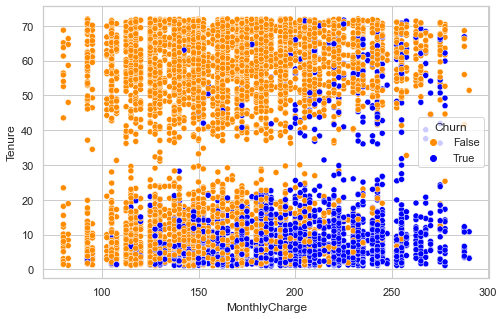

In [14]:
# plot decision boundaries
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.scatterplot(x='MonthlyCharge',y='Tenure',
    palette=['darkorange','blue'], hue=target,
    data=y_train.merge(X_train, left_index=True, right_index=True))

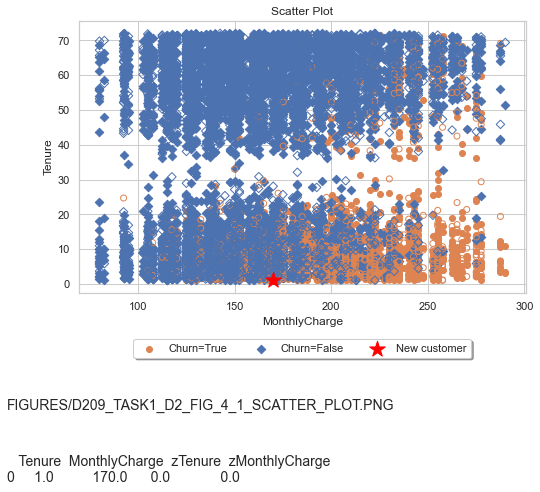

In [15]:
# scatter plot using the plotDataset() helper function
xFeature = 'MonthlyCharge' 
yFeature = 'Tenure'
target = 'Churn'
neighbors = []

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
plotDataset(ax, trainData, xFeature, yFeature, target, neighbors)
plotDataset(ax, testData, xFeature, yFeature, target, neighbors, showLabel=False, facecolors='none')

# plot new customer as a Star
ax.scatter(newCustomer.MonthlyCharge, newCustomer.Tenure, marker='*',
          label='New customer', color='red', s=270)

title = 'Scatter Plot'
plt.title(title)
plt.xlabel(xFeature) 
plt.ylabel(yFeature)

# configure legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='grey', label='Manual Label')
handles.append(patch) 
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

# add customer data text
plt.gcf().text(0, -.4, newCustomer.to_string(), fontsize=14)   

# add filename
f = getFilename(title, sect='d2',
                subfolder='figures', caption='4 1') # getFilename using helper
plt.gcf().text(0, -.2, f, fontsize=14) 

# save file
fig.savefig(f, dpi=150, bbox_inches='tight')

<div style="font-family:Impact;">Create and Train the Model. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Use KNeighborsClassifier object's fit method, which loads the sample training set (X_train) and target training set (y_train) into the estimator:</span></div>

In [16]:
# create model
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train['Churn'])

KNeighborsClassifier()

In [17]:
predicted = knn.predict(X=X_test)

In [18]:
observed = y_test['Churn']

In [19]:
wrong = [(p,e) for (p,e) in zip(predicted, observed) if p!=e]

In [20]:
len(wrong)

523

523 out of 3,000 were incorrectly predicted, that is 0.1743 or 17.4%.

In [21]:
knn.score(X_test, y_test)

0.8256666666666667

In [22]:
# hyperparamter tuning (Ref: Deitel (2020))
for k in range(1,40,2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
            X=X_train, y=y_train['Churn'], cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%};')

k=1 ; mean accuracy=78.53%;
k=3 ; mean accuracy=81.49%;
k=5 ; mean accuracy=81.53%;
k=7 ; mean accuracy=82.30%;
k=9 ; mean accuracy=82.39%;
k=11; mean accuracy=82.64%;
k=13; mean accuracy=82.69%;
k=15; mean accuracy=82.97%;
k=17; mean accuracy=83.06%;
k=19; mean accuracy=82.96%;
k=21; mean accuracy=83.26%;
k=23; mean accuracy=83.21%;
k=25; mean accuracy=83.24%;
k=27; mean accuracy=83.19%;
k=29; mean accuracy=83.33%;
k=31; mean accuracy=83.29%;
k=33; mean accuracy=83.27%;
k=35; mean accuracy=83.30%;
k=37; mean accuracy=83.57%;
k=39; mean accuracy=83.66%;


<div style="font-family:Impact;">Hyperparameter Tuning. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">From the tuning data, it appears that anything more than k=7 will give 82% or better accuracy, so I will use k=7 for the prediction.</span></div>

In [23]:
# scale new Customer data
newCustomer['zMonthlyCharge'] = (newCustomer['MonthlyCharge'] - clean['MonthlyCharge'].mean() ) / clean['MonthlyCharge'].std()
newCustomer['zTenure'] =  (newCustomer['Tenure'] - clean['Tenure'].mean() ) / clean['Tenure'].std()
newCustomerNorm = newCustomer[['zTenure','zMonthlyCharge']]
newCustomerNorm

,zTenure,zMonthlyCharge
0,-1.268,-0.061


<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-7.<span style="font-weight: normal;">K-NEAREST "TRAINING" NEIGHBORS</span></div>

In [24]:
# use NearestNeighbors from skikit-learn to compute knn
k=7 # determined from the hyperparameter tuning above
knn = NearestNeighbors(n_neighbors=k)
knn.fit(trainData.iloc[:,3:5])
distances, indices = knn.kneighbors(newCustomerNorm)
training_neighbors = trainData.iloc[indices[0],:]

# provide training neighbors
d = training_neighbors
f = getFilename('TRAINING NEIGHBORS', sect='D2',
        subfolder='tables', caption='4 7', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d)
print('Table saved to: {}'.format(f))

,Tenure,MonthlyCharge,zMonthlyCharge,zTenure,Churn
3359,1.035,127.496,-1.051,-1.267,False
947,1.047,144.961,-0.644,-1.266,False
2759,1.050,157.470,-0.353,-1.266,False
3009,1.125,169.993,-0.061,-1.263,False
823,1.128,212.641,0.932,-1.263,False
4254,1.140,127.525,-1.050,-1.263,False
4396,1.150,164.971,-0.178,-1.262,False


Table saved to: TABLES/D209_TASK1_D2_TAB_4_7_TRAINING_NEIGHBORS.CSV


<div style="font-family:Impact;">Final Prediction. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Calculate final prediction using the complete set of scaled data. Select a value for k from the figure above, let's select k=7 which looks like it should have about 82% accurary. Create a list of the neighbors in order to include highlighted neighbors on the next plot.</span></div>

In [26]:
# retrain with full data.
k=7
knn = KNeighborsClassifier(n_neighbors=k).fit(X[['zTenure','zMonthlyCharge']], y['Churn'])
distances, indices = knn.kneighbors(newCustomerNorm)
print('Churn prediction (k={}) for \n{} is \n{}'.format(k,newCustomer,knn.predict(newCustomerNorm)))
df_neighbors = clean.iloc[indices[0],:]
neighbors = df_neighbors.index
neighbors = neighbors.to_list()
print(df_neighbors)

Churn prediction (k=7) for 
   Tenure  MonthlyCharge  zTenure  zMonthlyCharge
0     1.0          170.0   -1.268          -0.061 is 
[ True]
      Churn  Tenure  MonthlyCharge  zMonthlyCharge  zTenure
4030   True   1.115        169.938          -0.063   -1.264
3009  False   1.125        169.993          -0.061   -1.263
2241   True   1.198        169.938          -0.063   -1.260
557    True   1.411        169.938          -0.063   -1.252
2855   True   1.462        169.945          -0.062   -1.250
53     True   1.553        169.945          -0.062   -1.247
951    True   1.600        169.938          -0.063   -1.245


<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 4-3.<span style="font-weight: normal;">FINAL CLASSIFICATION OF NEW CUSTOMER WITH NEIGHBORS (RED CIRCLES) USED TO CLASSIFY WITH THE NEIGHBOR DATA SORTED BY DISTANCE FROM NEW CUSTOMER</span></div>Include data table using .to_string() method. Adjust plot so that text does not get cut off at bottom. Ref: (1) https://stackabuse.com/how-to-iterate-over-rows-in-a-pandas-dataframe/, (2) https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel

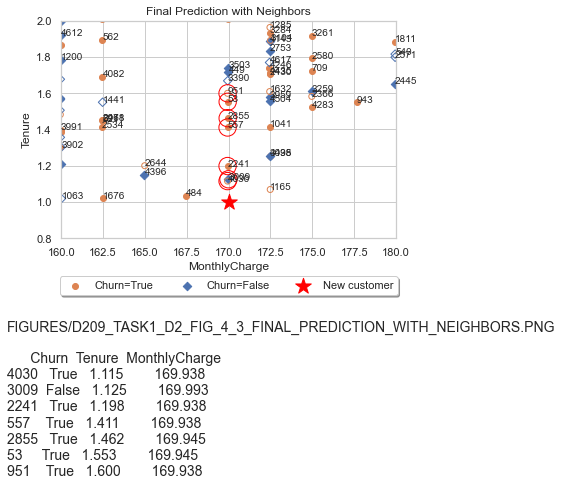

In [28]:
# scatter plot using the plotDataset() helper function
xFeature = 'MonthlyCharge' 
yFeature = 'Tenure'
fig, ax = plt.subplots()
plotDataset(ax, trainData, xFeature, yFeature, target, neighbors)
plotDataset(ax, testData, xFeature, yFeature, target, neighbors, showLabel=False, facecolors='none')

# plot new customer as a Star
ax.scatter(newCustomer.MonthlyCharge, newCustomer.Tenure, marker='*',
          label='New customer', color='red', s=270)

# highlight neighbors with red circles
if len(neighbors) > 0:
    for n in neighbors:
        point = clean.iloc[n]
        ax.scatter(point.MonthlyCharge, point.Tenure, marker='o',
                color='red', s=300, facecolors='none')

title = 'Final Prediction with Neighbors'
plt.title(title)
plt.xlabel(xFeature) 
plt.ylabel(yFeature)

# set axis limits centered around the new customer
left = float(newCustomer.MonthlyCharge) - 4
right = float(newCustomer.MonthlyCharge) + 4
top = float(newCustomer.Tenure) - 4
bottom = float(newCustomer.Tenure) + 3
ax.set_xlim(160,180)
ax.set_ylim(.8,2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
f = getFilename(title, sect='d2',
        subfolder='figures', caption='4 3') # getFilename using helper
plt.gcf().text(0, -.2, f, fontsize=14) 

# loop through neighbors and include neighbor as table data
#for idx,n in enumerate(df_neighbors.iloc[:, 0:3]):
#    plt.gcf().text(0, -.5+(.05*idx), n, fontsize=10) 
plt.gcf().text(0, -.7, df_neighbors.iloc[:, 0:3].to_string(), fontsize=14)     

fig.savefig(f, dpi=150, bbox_inches='tight')
plt.show()

<div style="font-family:Impact;">Summary. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The KNN model calculated the new customer as Churn=True, with 6 of 7 neighbors with Churn=True.</span></div>

<h3>D3. Provide the code used to perform the classification analysis from part D2.</h3>

<div style="font-family:Impact;">Code. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">All code and output is contained within this Jupyter notebook. The notebook file is called <b>D209_1_x.ipynb</b> and the associated PDF version is called <b>D209_1_x - Jupyter Notebook.pdf</b>.</span></div>

<h2>Part V: Data Summary and Implications</h2>

<h3>E1. Explain the accuracy and the area under the curve (AUC) of your classification model.</h3>

<div style="font-family:Impact;">Confusion and Classification Report. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Look at confusion and classification report to determine overall accuracy of the KNN model.</span></div>

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 5-1.<span style="font-weight: normal;">CONFUSION MATRIX AND METRICS </span></div>Ref: (1) https://classeval.wordpress.com/introduction/basic-evaluation-measures/, (2) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

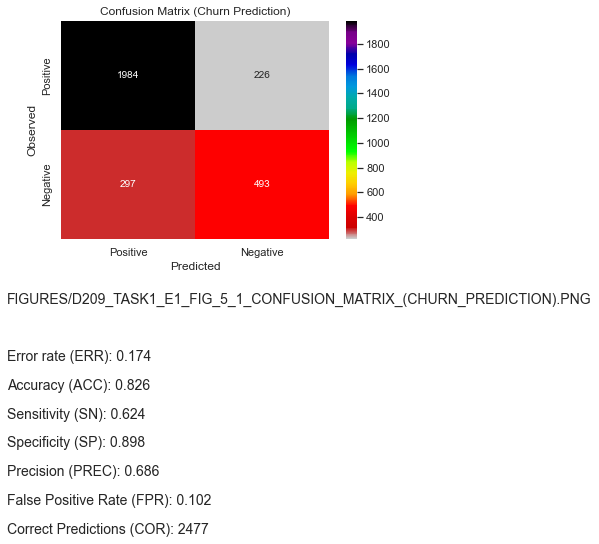

In [29]:
# confusion matrix
confusion = confusion_matrix(y_true=observed, y_pred=predicted)

# create plot
fig, ax = plt.subplots()
ax = sns.heatmap(confusion, annot=True,
            cmap='nipy_spectral_r', fmt='d')
title = 'Confusion Matrix (Churn Prediction)'
plt.title(title)
ax.set_xlabel('Predicted');
ax.set_ylabel('Observed'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']);
ax.yaxis.set_ticklabels(['Positive', 'Negative']);

# add filename
f = getFilename(title, sect='E1',
                subfolder='figures', caption='5 1') # getFilename using helper
plt.gcf().text(0, -.1, f, fontsize=14) 

# add measurements
TN, FP, FN, TP = confusion_matrix(y_true=observed, y_pred=predicted).ravel()
P = TP + FP
N = TN + FN
ERR = (FP + FN) / (TP + TN + FN + FP) # Error rate
ACC = (TP + TN) / (TP + TN + FN + FP) # Accuracy
SN = TP / (TP + FN) # Sensitivity
SP = TN / (TN + FP) # Specificity
PREC = TP / (TP + FP) # Precision
FPR = FP / (TN + FP) # False Positive Rate
COR = TP + TN

plt.gcf().text(0, -.3, 'Error rate (ERR): ' + str(ERR.round(3)), fontsize=14) 
plt.gcf().text(0, -.4, 'Accuracy (ACC): ' + str(ACC.round(3)), fontsize=14) 
plt.gcf().text(0, -.5, 'Sensitivity (SN): ' + str(SN.round(3)), fontsize=14) 
plt.gcf().text(0, -.6, 'Specificity (SP): ' + str(SP.round(3)), fontsize=14) 
plt.gcf().text(0, -.7, 'Precision (PREC): ' + str(PREC.round(3)), fontsize=14) 
plt.gcf().text(0, -.8, 'False Positive Rate (FPR): ' + str(FPR.round(3)), fontsize=14)  
plt.gcf().text(0, -.9, 'Correct Predictions (COR): ' + str(COR.round(3)), fontsize=14)  


# save file
fig.savefig(f, dpi=150, bbox_inches='tight')

<div style="font-family:Impact;">Receiver Operation Characteristic (ROC) ad Area Under Curve (AUC). <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Calculate and plot ROC and AOUC. Add custom text annotation to the plot. </span></div>

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 5-2.<span style="font-weight: normal;">RECEIVER OPERATION CHARACTERISTIC (ROC)</span></div>Ref: (1) <a HREF="https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots" target="_blank" rel="noopener noreferrer">https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots</a>, (2) <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html" target="_blank" rel="noopener noreferrer">https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html</a>, (3) <a href="https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python" target="_blank" rel="noopener noreferrer">https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python</a> and (4) <a href="https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5" target="_blank" rel="noopener noreferrer">https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5</a>

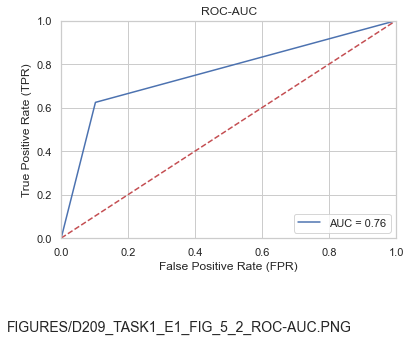

In [30]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(observed, predicted)
auc = metrics.auc(fpr, tpr)

# method I: plt
fig, ax = plt.subplots()
title = 'ROC-AUC'
plt.title(title)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
f = getFilename(title, sect='e1',
    subfolder='figures', caption='5 2') # getFilename using helper
#plt.gcf().text(0, -.1, 'Area Under Curve (AUC): {:.2f}'.format(auc), fontsize=14) 
plt.gcf().text(0, -.2, f, fontsize=14) 
fig.savefig(f, dpi=150, bbox_inches='tight')
plt.show()

<h3>E2. Discuss the results and implications of your classification analysis.</h3>

<div style="font-family:Impact;">Summary. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Looks like $1984+493 = 2477$ predictions on the diagonal were correct for an accuracy of about 82.56%. Analysis predicts 83% that the new customer is Churn=True, so, therefore, there is also the 17% chance that the new customer is actually Churn=False.</span></div>

<h3>E3. Discuss <b>one</b> limitation of your data analysis.</h3>

<div style="font-family:Impact;">Limitations. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">It occus to me that a new customer is new, that is, their <b>Tenure</b> will always be low compared to other existing customers. The KNN analysis will never make it to the higher <b>Tenure</b> numbers. Future study may look at other features instead such as <b>Income</b>, <b>Bandwidth_GB_Year</b>, or <b>Outage_sec_perweek</b> which may provide better insight.</span></div>

<h3>E4. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.</h3>

<div style="font-family:Impact;">Recommendations. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Recommend additional data analysis to determine if there are other factors besides Tenure that might be used to better predict and classify customers.</span></div>

<div style="font-family:Impact;">Additional rcommendations. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Company can use this KNN prediction model to share with on-boarding teams working with new customers. Although 'Tenure' is one of the predictive variables, the new customer has a better chance of remaining with the company during the initial months if the overall 'MonthlyCharge' can be minimized. In addition, the company should review every customer using the predictive model anytime the 'MonthlyCharge' is changed, specifically, if the 'MonthlyCharge' were ever to execeed a specificed amount, say more than $170, for example, or if the customer's 'Tenure' exceeds a specified timeframe, maybe say 27 months. The specific amount and timeframe can be calculated in a follow up analysis using classification trees.</span></div>

<h2>Part VI: Demonstration</h2>

<h3>F. Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.</h3>

<div style="font-family:Impact;">Video. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Panapto video was created and is located at: <a href="https://wgu.edu" target="_blank" rel="noopner noreferrer">https://wgu.edu</a></span></div>

<h3>G. Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.</h3>

<div style="font-family:Impact;">Configure Scrollbars. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Disable scrollbars in notebook.</span></div>

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<div style="font-family:Impact;">Disable Auto Scroll. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Disable automatically scroll to bottom.</span></div>

In [ ]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<div style="font-family:Impact;">Toggle Notebook Warnings. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Use the following code to toggle warning messages in the notebook. Another piece of code courtesy of stackoverflow (2021). <a href="https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython" target="_blank" rel="">https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython</a></span></div>

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

<div style="font-family:Impact;">Terminal List Files. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">List all of the  files from the current working directory. Ref: (1) <a href="https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel" target="_blank" rel="https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel">Fessel, K. (2021). How to save a matplotlib figure and fix text cutting off || Matplotlib Tips</a> Retrieved from https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel</span></div>

In [ ]:
!ls

In [ ]:
!du -h *.*

<div style="font-family:Impact;">List Installed Packages. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">List of all installed PIP packages and the versions.</div>Ref: (1) https://pip.pypa.io/en/stable/cli/pip_list/

In [ ]:
!pip list

<div class="impact" data-hdr="UPDATE PACKAGE WITHIN NOTEBOOK">Update a specific package within notebook.</div>Ref: (1) https://stackoverflow.com/questions/54453219/why-can-i-see-pip-list-sklearn-but-not-in-jupyter-when-i-run-a-code

In [ ]:
!python -m pip install -U scikit-learn

<div style="font-family:Impact;">Merget Two Dataframes. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Code to merge two dataframes. Ref: (1) https://stackoverflow.com/questions/26265819/how-to-merge-a-series-and-dataframe</span></div>

In [ ]:
# merge X and y back together, for example
d = X.merge(y, left_index=True, right_index=True)
display(d.head())

<div style="font-family:Impact;">List .index() Function. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The .index() method returns the index of the specified element in the list. Ref: (1) https://www.programiz.com/python-programming/methods/list/index</span></div>

In [ ]:
animals = ['cat', 'dog', 'rabbit', 'horse']
# get the index of 'dog'
index = animals.index('dog')
print(index)

<div style="font-family:Impact;">Row Index Names in Pandas. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Code to get rows/index names in a Pandas dataframe. Ref: (1) https://www.geeksforgeeks.org/how-to-get-rows-index-names-in-pandas-dataframe/</span></div>

In [ ]:
# making data frame 
data = cleanData
  
# calling head() method  
# storing in new variable 
data_top = data.head() 
    
# iterating the columns
for row in data_top.index:
    print(row, end = " ")

<div style="font-family:Impact;">Tutorial Python Subplots. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Tutorial: Python Subplots Ref: (1) https://www.kaggle.com/asimislam/tutorial-python-subplots</span></div>

In [ ]:
#  Categorical Data
heart_CAT = ['Churn']

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i in heart_CAT:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(x=i, data=cleanData, palette='hls')
    c = c + 1

plt.show()

<div style="font-family:Impact;">PASS FIG TO CUSTOM PLOT FUNCTION. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">A great way to do this is to pass a figure object to your code and have your function add an axis then return the updated figure. Here is an example: Ref: (1) https://stackoverflow.com/questions/43925337/matplotlib-returning-a-plot-object</span></div>

In [ ]:
def plot_hist_overlay(feature, fig, p, bins=8):

    # data
    df_yes = cleanData[cleanData.Churn==True][feature]
    df_no = cleanData[cleanData.Churn==False][feature]
    
    # plot stacked hist
    ax = f.add_subplot() # here is where you add the subplot to f
    plt.hist([df_yes,df_no], bins=bins, stacked=True)
    
    # add title
    plt.title(feature + ' grouped by target', size=16)
    
    # tick marks
    ax.set_xticks([])
    #ax.set_yticks([]) # use default
    
    # add axis labels
    plt.xlabel(feature)
    plt.ylabel('# Churn')
    
    # add legend
    ax.legend(['Churn - Yes','Churn - No'])

    return(f)

target = 'Churn'
features = ['MonthlyCharge','Tenure']
bins = 6
for idx,fea in enumerate(features):
    fig_size = (6,5)
    f = plt.figure(figsize=fig_size)
    f = plot_hist_overlay(fea, fig=f, p=idx+1, bins=bins)
    file = getFilename(fea, 'z1','fig 9 ' + str(idx+1)) # getFilename using helper
    plt.gcf().text(0.1, 0, file, fontsize=14) 
    
    # data table
    b = pd.cut(cleanData[fea], bins=bins) # create bins (b) of numeric feature
    dt = pd.crosstab(cleanData[target], b)
    plt.gcf().text(0.1, -.4, dt.T.to_string(), fontsize=14)
    #print(dt.T)
    
    f.savefig(file, dpi=150, bbox_inches='tight')

#f = plot_hist_overlay('MonthlyCharge', fig=f, p=3)
#f = plot_hist_overlay('Tenure', fig=f, p=2)

<div style="font-family:Impact;">Enabling Jupyter Notebook extensions. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> Ref: (1) https://tljh.jupyter.org/en/latest/howto/admin/enable-extensions.html</span></div>

<div style="font-family:Impact;">How to Use HTML to Open a Link in a New Tab. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> Ref: (1)https://www.freecodecamp.org/news/how-to-use-html-to-open-link-in-new-tab/</span></div>

<div style="font-family:Impact;">CSS Tutorial. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> This is a great resource for CSS code with many examples. Ref: (1)https://www.w3schools.com/css/default.asp</span></div>

<div style="font-family:Impact;">HTML Tutorial. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> This is a great resource for HTML code with many examples. Ref: (1)https://www.w3schools.com/html/default.asp</span></div>

<div style="font-family:Impact;">Inline Styles in HTML. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> Usually, CSS is written in a separate CSS file (with file extension .css) or in a 'style' tag inside of the 'head' tag, but there is a third place which is also valid. The third place you can write CSS is inside of an HTML tag, using the style attribute. When CSS is written using the style attribute, it’s called an “inline style”. In general, this is not considered a best practice. However, there are times when inline styles are the right (or only) choice. Ref: (1) https://www.codecademy.com/articles/html-inline-styles</span></div>

<h3>H. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.</h3>

<div style="font-family:Impact;">Deitel, P. +<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2020). Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud</span></div>

<div style="font-family:Impact;">Geron, A.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2019). Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, Tools and Techniques to Build Intelligent Systems</span></div>

<div style="font-family:Impact;">Rite, S.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2018). Demystifying ‘Confusion Matrix’ Confusion</span></div>https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

<div style="font-family:Impact;">Robinson, S. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2021). K-Nearest Neighbors Algorithm in Python and Scikit-Learn</span></div>https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

<div style="font-family:Impact;">Sharma, A.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2021). K-Nearest Neighbors (KNN) on Customer Churn Data</span></div>https://medium.com/data-science-on-customer-churn-data/k-nearest-neighbors-knn-on-customer-churn-data-40e9b2bb9266

<div style="font-family:Impact;">Shmueli, G. +<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2020). Data Mining for Business Analytics: Concepts, Techniques, and Application in Python</span></div>